<a href="https://colab.research.google.com/github/Pallavisuma/CMPE257-Fall23-PallaviSuma-Kurmala/blob/class-activities/LinearRegressionComplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [22]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)



In [23]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color )

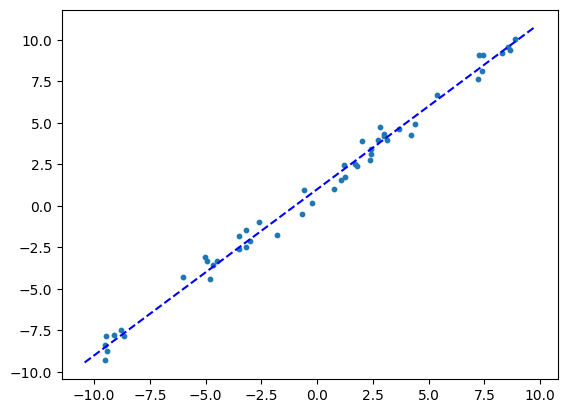

In [24]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [25]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [32]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [33]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape
XtX_inv

array([[2.00038304e-02, 5.09216806e-05],
       [5.09216806e-05, 6.76948641e-04]])

In [34]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 0.02012432,  0.01956297,  0.02038278,  0.01982427,  0.01991137,
         0.02014291,  0.01977415,  0.01984074,  0.01955554,  0.02009381,
         0.01974836,  0.01984174,  0.02038009,  0.02014823,  0.02006578,
         0.02009108,  0.0196975 ,  0.02021834,  0.01997273,  0.019969  ,
         0.02006794,  0.01952215,  0.0200576 ,  0.01985061,  0.01953909,
         0.02044065,  0.02042653,  0.02022815,  0.02045584,  0.02019108,
         0.02012571,  0.02004128,  0.02037201,  0.01952349,  0.02015658,
         0.02015706,  0.02037441,  0.01975955,  0.01951994,  0.01982531,
         0.02027735,  0.02016243,  0.01999207,  0.01951956,  0.02044542,
         0.02010581,  0.01975292,  0.01976572,  0.01987064,  0.02012738],
       [ 0.00165265, -0.00580982,  0.00508867, -0.00233618, -0.00117829,
         0.0018999 , -0.00300238, -0.00211721, -0.00590868,  0.0012471 ,
        -0.00334526, -0.00210395,  0.00505293,  0.00197051,  0.00087442,
         0.00121087, -0.00402146,  0.00290263, -0.

In [35]:
w = np.matmul(X_pi, Y)
w

array([1.01392973, 0.98866509])

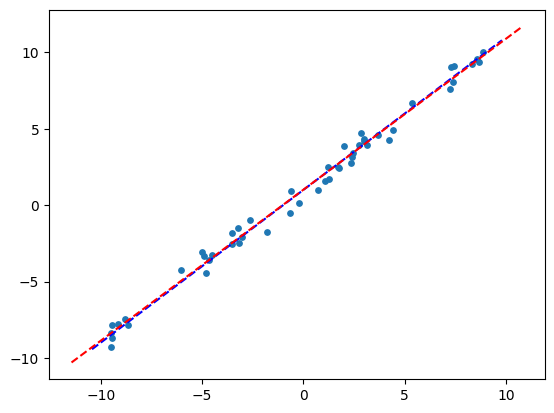

In [36]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 15)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [37]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))

13.519358737419251

In [38]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

1706.8184403352845

In [39]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))

16.33465091261508

In [40]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
np.sum(np.square(Y_pred_test_target-Y_test))

17.087196562171396

In [41]:
def ridge_regularization(X, Y, lambda_alpha):
    XtX = np.matmul(np.transpose(X), X)
    n, m = XtX.shape
    penality = lambda_alpha * np.identity(m)
    XtX_reg = XtX + penality
    XtX_inv = np.linalg.inv(XtX_reg)
    X_pi = np.matmul(XtX_inv, np.transpose(X))
    w = np.matmul(X_pi, Y)
    return w


In [42]:
def mean_squared_error(Y_pred, Y):
    return np.mean(np.square(Y_pred - Y))

In [53]:
N = 50
data = generate_lr(N, 1, 1)

# Split the data into input (X) and target (Y)
X = [[i[0], i[1]] for i in data]
Y = [i[2] for i in data]


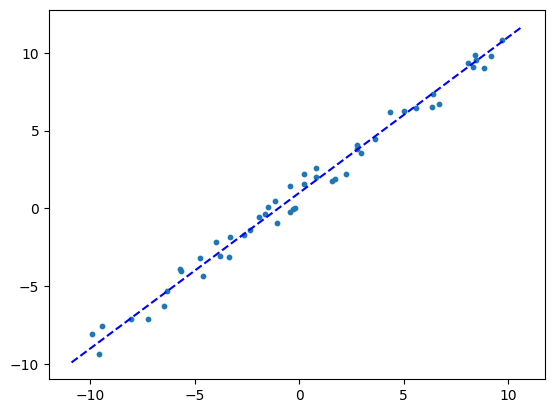

In [54]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [55]:
labda_alpha = [0, 0.001, 0.1, 1]

In [56]:
mse_results = {}
# 5-fold cross-validation
k = 5
fold_size = N // k


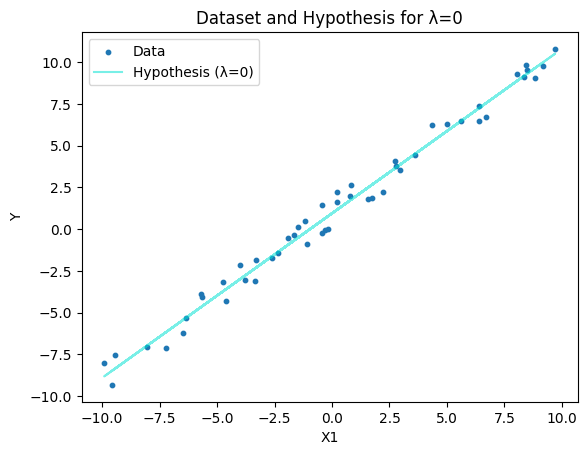

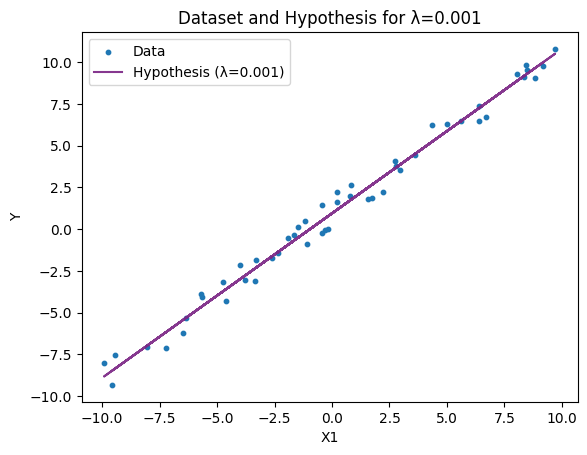

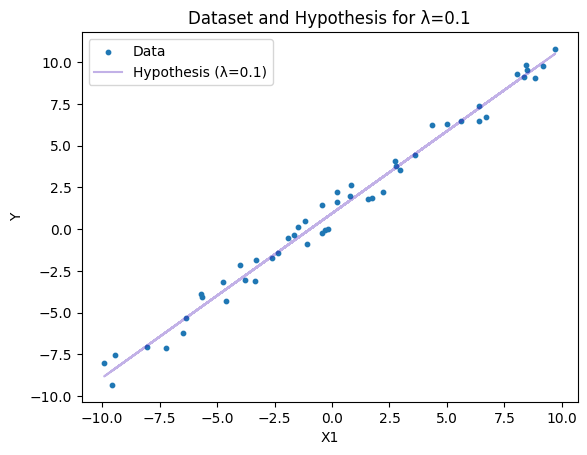

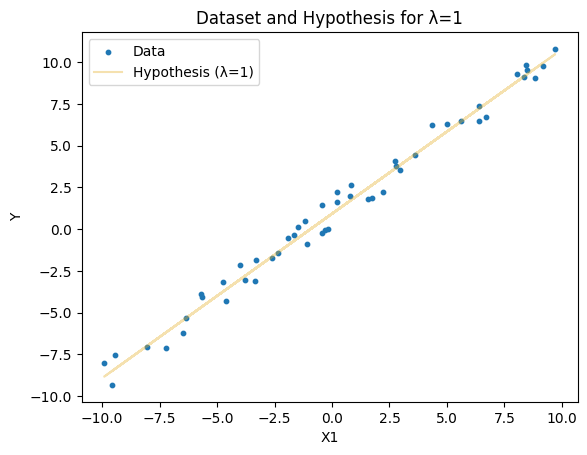

In [61]:
for lambda_reg in labda_alpha:
    mse_list = []
    for fold in range(k):
        # Split the data into training and validation sets
        start = fold * fold_size
        end = (fold + 1) * fold_size
        X_train = X[:start] + X[end:]
        Y_train = Y[:start] + Y[end:]
        X_val = X[start:end]
        Y_val = Y[start:end]

        # Compute regularized weights on the training set
        w = ridge_regularization(X_train, Y_train, lambda_reg)


            # Predict on the validation set
        Y_pred_val = np.matmul(X_val, w)

        # Calculate mean squared error on the validation set
        mse = mean_squared_error(Y_pred_val, Y_val)
        mse_list.append(mse)

    hypothesis = np.matmul(X, w)
    label = f"Hypothesis (λ={lambda_reg})"
    color = np.random.rand(4,)
    plt.figure()
    plt.scatter(X1, Y, s=10, label="Data")
    plt.plot(X1, hypothesis, color=color, label=label)
    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("Y")
    plt.title(f"Dataset and Hypothesis for λ={lambda_reg}")

    # Calculate the average MSE across all folds
    avg_mse = np.mean(mse_list)
    mse_results[lambda_reg] = avg_mse

In [58]:
#The best-performing model (lowest MSE)
best_lam = min(mse_results, key=mse_results.get)

# The best model on the entire dataset
best_w = ridge_regularization(X, Y, best_lam)

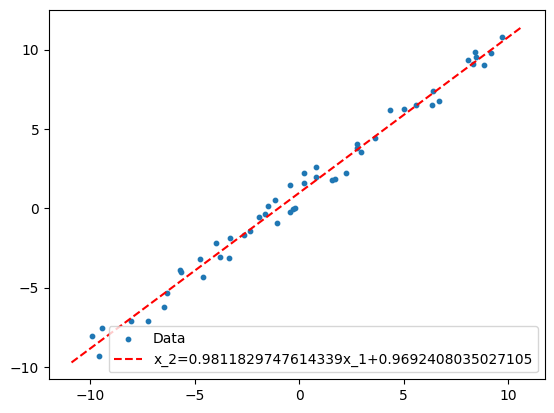

Best lambda: 0.1
Best model weights: [0.9692408  0.98118297]


In [60]:
X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10, label="Data")
#abline(1, 1, color='b')
abline(best_w[1], best_w[0], color='r')
plt.legend()
plt.show()

print("Best lambda:", best_lam)
print("Best model weights:", best_w)